## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline
import warnings
sns.set_context('notebook')
warnings.filterwarnings('ignore')
import scipy as sp

In [2]:
data_folder = 'Data/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

In [3]:
data = pd.read_csv( 'Data/acs2015_county_data.csv')
data.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [4]:
data.shape

(3220, 37)

In [5]:
data.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

We only need the relevant columns for this task: `CensusId`, `State`, `County`, `IncomePerCap`, `SelfEmployed`.

In [6]:
employment_data = data[['CensusId', 'State', 'County', 'IncomePerCap', 'SelfEmployed']]
employment_data.head()

,CensusId,State,County,IncomePerCap,SelfEmployed
0,1001,Alabama,Autauga,24974,5.5
1,1003,Alabama,Baldwin,27317,5.8
2,1005,Alabama,Barbour,16824,7.3
3,1007,Alabama,Bibb,18431,6.7
4,1009,Alabama,Blount,20532,4.2


**A)** Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,220 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

We use a scatter plot to discover the dependency between `SelfEmployed` and `IncomePerCap`.

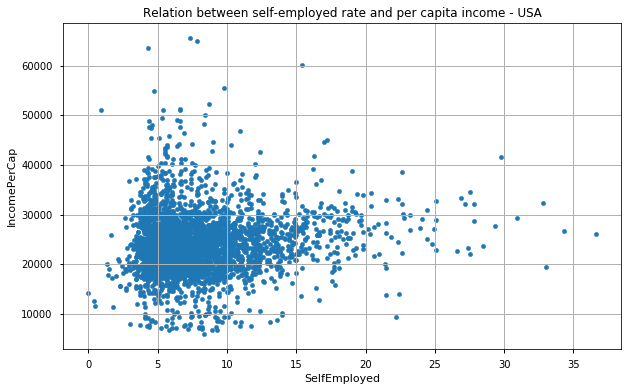

In [7]:
employment_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', figsize=(10, 6), \
                     title='Relation between self-employed rate and per capita income - USA', grid=True)

We use `scipy.stats.pearsonr` to calculates a Pearson correlation coefficient and the p-value for testing non-correlation. The p-value can be used as a notion of confidence.

In [8]:
print('For USA:\n')
r, p = sp.stats.pearsonr(employment_data['SelfEmployed'], employment_data['IncomePerCap'])
print("Pearson's correlation coefficient: " + str(r) + "\n2-tailed p-value: " + str(p))

For USA:

Pearson's correlation coefficient: 0.08727386609551786
2-tailed p-value: 7.052861196511526e-07


From the plot, we cannot observe a clear linear relationship between `SelfEmployed` and `IncomePerCap`. 

The pearson coefficient is close to 0 (<0.1), so the positive correlation is very weak. And we are 99% confident about it because p-value<0.01.

So we cannot be convinced by the statement that citizens in counties that have a higher percentage of self-employed people earn more per capita.

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

We first define a function for filtering data from different states. It will also be useful for D).

In [9]:
# get corresponding data from state name
def filter_data(state_name):
    return employment_data[employment_data['State'] == state_name]

In [10]:
WI_data = filter_data('Wisconsin')
TN_data = filter_data('Tennessee')
MN_data = filter_data('Minnesota')

In [11]:
set_A_data = WI_data.append(TN_data).append(MN_data)

Then we can repeat the steps in A) and see what happens.

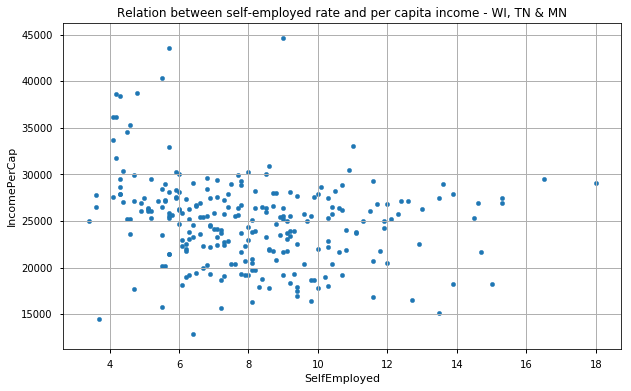

In [12]:
set_A_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', figsize=(10, 6), \
                title='Relation between self-employed rate and per capita income - WI, TN & MN', grid=True)

In [13]:
print('For set A:\n')
r, p = sp.stats.pearsonr(set_A_data['SelfEmployed'], set_A_data['IncomePerCap'])
print("Pearson's correlation coefficient: " + str(r) + "\n2-tailed p-value: " + str(p))

For set A:

Pearson's correlation coefficient: -0.20229350736521498
2-tailed p-value: 0.0011881639322138852


The pearson coefficient is negative and its absolute value is about 0.20. So there is a weak negative correlation between self-employed rate and per capita income for set A. And we are 99% confident about it because p-value<0.01.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

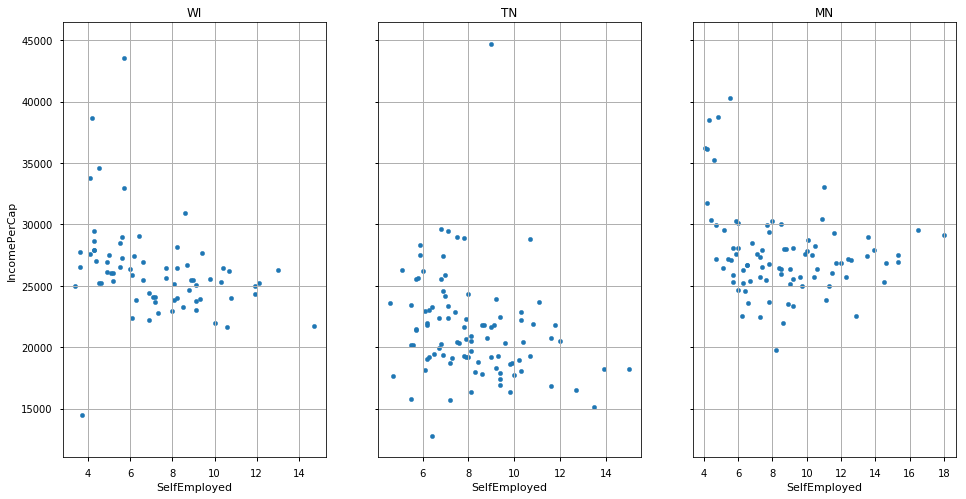

In [14]:
fig, axs = plt.subplots(1, 3, sharey=True)
WI_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', title='WI', ax=axs[0], figsize=(16, 8), grid=True)
TN_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', title='TN', ax=axs[1], grid=True)
MN_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', title='MN', ax=axs[2], grid=True)

In [15]:
print('For WI:\n')
r, p = sp.stats.pearsonr(WI_data['SelfEmployed'], WI_data['IncomePerCap'])
print("Pearson's correlation coefficient: " + str(r) + "\n2-tailed p-value: " + str(p))

print('\nFor TN:\n')
r, p = sp.stats.pearsonr(TN_data['SelfEmployed'], TN_data['IncomePerCap'])
print("Pearson's correlation coefficient: " + str(r) + "\n2-tailed p-value: " + str(p))

print('\nFor MN:\n')
r, p = sp.stats.pearsonr(MN_data['SelfEmployed'], MN_data['IncomePerCap'])
print("Pearson's correlation coefficient: " + str(r) + "\n2-tailed p-value: " + str(p))

For WI:

Pearson's correlation coefficient: -0.32905300016378525
2-tailed p-value: 0.004768134887745234

For TN:

Pearson's correlation coefficient: -0.23836048684913141
2-tailed p-value: 0.020011631955528197

For MN:

Pearson's correlation coefficient: -0.2538551921654062
2-tailed p-value: 0.017665199300911965


All the p-values are less than 0.05 so we are 95% confident about these correlations.

By comparing the absolute values of pearson coefficients in set A, we can see that the observed effect of self-employment on per-capita income is the strongest in Wisconsin, which is about 0.33(still weak).

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Repeat the steps in B) and C):

In [16]:
NJ_data = filter_data('New Jersey')
KS_data = filter_data('Kansas')
RI_data = filter_data('Rhode Island')

In [17]:
set_B_data = NJ_data.append(KS_data).append(RI_data)

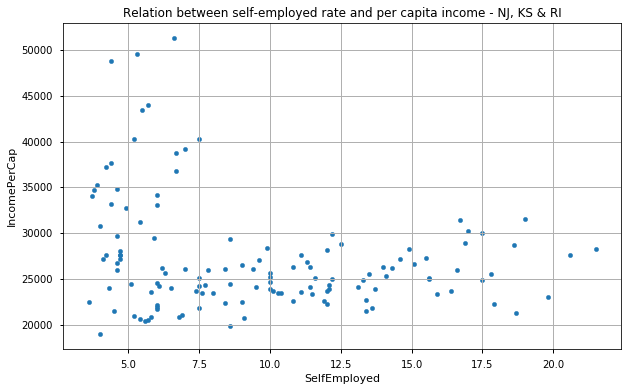

In [18]:
set_B_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', figsize=(10, 6), \
                title='Relation between self-employed rate and per capita income - NJ, KS & RI', grid=True)

In [19]:
print('For set B:\n')
r, p = sp.stats.pearsonr(set_B_data['SelfEmployed'], set_B_data['IncomePerCap'])
print("Pearson's correlation coefficient: " + str(r) + "\n2-tailed p-value: " + str(p))

For set B:

Pearson's correlation coefficient: -0.23222141346085687
2-tailed p-value: 0.007607493042857412


The pearson coefficient is negative and its absolute value is about 0.23. So there is a weak negative correlation between self-employed rate and per capita income for set B. And we are 99% confident about it because p-value<0.01.

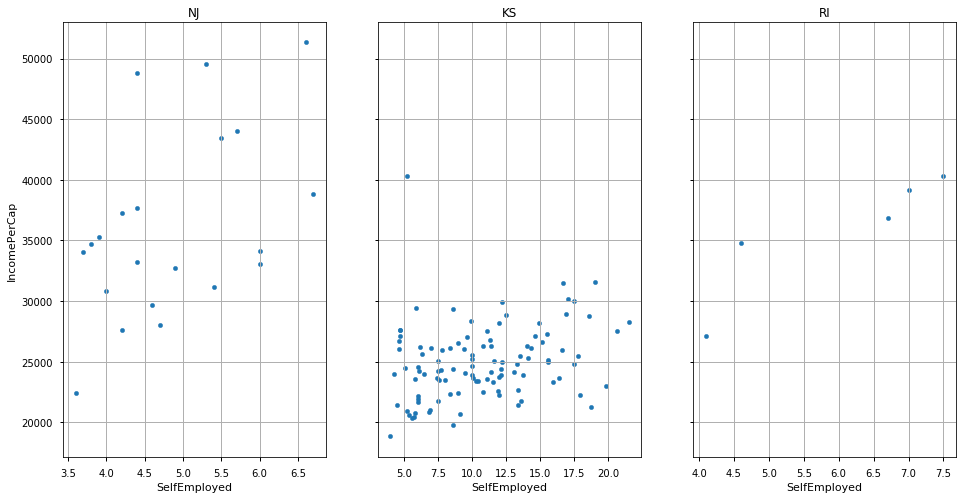

In [20]:
fig, axs = plt.subplots(1, 3, sharey=True)
NJ_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', title='NJ', ax=axs[0], figsize=(16, 8), grid=True)
KS_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', title='KS', ax=axs[1], grid=True)
RI_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', title='RI', ax=axs[2], grid=True)

In [21]:
print('For NJ:\n')
r, p = sp.stats.pearsonr(NJ_data['SelfEmployed'], NJ_data['IncomePerCap'])
print("Pearson's correlation coefficient: " + str(r) + "\n2-tailed p-value: " + str(p))

print('\nFor KS:\n')
r, p = sp.stats.pearsonr(KS_data['SelfEmployed'], KS_data['IncomePerCap'])
print("Pearson's correlation coefficient: " + str(r) + "\n2-tailed p-value: " + str(p))

print('\nFor RI:\n')
r, p = sp.stats.pearsonr(RI_data['SelfEmployed'], RI_data['IncomePerCap'])
print("Pearson's correlation coefficient: " + str(r) + "\n2-tailed p-value: " + str(p))

For NJ:

Pearson's correlation coefficient: 0.4804478471336282
2-tailed p-value: 0.027488944757806204

For KS:

Pearson's correlation coefficient: 0.25810299714436913
2-tailed p-value: 0.007853351846832446

For RI:

Pearson's correlation coefficient: 0.9021788382149803
2-tailed p-value: 0.036183102015759236


All the p-values are less than 0.05 so we are 95% confident about these correlations.

By comparing the absolute values of pearson coefficients in set B, we can see that the observed effect of self-employment on per-capita income is the strongest in Rhode Island, which is about 0.9(very strong positive correlation).

By the analysis above, I would recommend incentivizing self-employment in set B. 

In set A, we can only observe a weak negative correlation between self-employment on per-capita income in each of the three states(WI, TN & MN). This cannot convince us that incentivizing self-employment will lead to a high per-capita income. 

However, in set B, we observe a positive correlation between self-employment on per-capita income in each of the three states(NJ, KS & RI). The positive correlation in RI is rather strong(about 0.9), and the positive correlation in NJ is moderate(about 0.48). This convinces us that incentivizing self-employment in these three states may lead to a high per-capita income.

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

# **A)** 

In [22]:
aac_raw = pd.read_csv('Data/aac_intakes_outcomes.csv')
aac_raw.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


We take the features required in the task and use pd_get_dummies to the 10 features to realize dummy-variable encoding.

Also, we turn the desired outcome (outcome_type) to a binary value. According to task, we turn the value 'Adoption' to 1 and turn others to -1.

In [23]:
features=['animal_type','intake_year','intake_condition','intake_number','intake_type','sex_upon_intake','age_upon_intake_(years)',
             'time_in_shelter_days' ,'sex_upon_outcome','age_upon_outcome_(years)']
labels=['outcome_type']
aac_features = pd.get_dummies(aac_raw[features])
aac_labels = aac_raw[labels]
aac_labels.replace('Adoption',1,inplace=True)
aac_labels[aac_labels['outcome_type']!=1]=-1
aac_labels.describe()

,outcome_type
count,79672.000000
mean,-0.156692
std,0.987654
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,1.000000
max,1.000000


We split the data into training set and testing set with a ratio of 80% and 20 %. Since we will do randomization in later cross validation process. Here we just take the first 80% of raw dataset to training set.

In [24]:
aac_len=len(aac_features)
train_features= aac_features[:round( 0.8 * aac_len )]
test_features = aac_features[round( 0.8 * aac_len ):]
train_labels= aac_labels[:round( 0.8 * aac_len )]
test_labels= aac_labels[round( 0.8 * aac_len ):]

Then we do the normalization. We calculate the mean and std of each column of feature in training set and use the calculated result to realize the normalization in both training and testing datasets.

In [25]:
for temp_col in aac_features.columns:
    temp_mean=train_features[temp_col].mean()
    temp_std=train_features[temp_col].std()
    train_features[temp_col]=(train_features[temp_col]-temp_mean)/temp_std
    test_features[temp_col]=(test_features[temp_col]-temp_mean)/temp_std

train_features.head()

,intake_year,intake_number,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
0,1.868966,-0.288758,2.667968,-0.375085,2.648524,-0.062625,-0.7594,0.854223,-0.234674,-0.067136,...,-0.639729,-0.673232,2.230886,-0.415348,-0.301339,-0.355261,-0.365212,1.328961,-0.694631,-0.301339
1,-0.936882,1.765815,1.644986,-0.360098,1.628304,-0.062625,-0.7594,0.854223,-0.234674,-0.067136,...,-0.639729,-0.673232,2.230886,-0.415348,-0.301339,-0.355261,-0.365212,1.328961,-0.694631,-0.301339
2,-0.936882,3.820388,1.303992,-0.363353,1.288231,-0.062625,-0.7594,0.854223,-0.234674,-0.067136,...,-0.639729,-0.673232,2.230886,-0.415348,-0.301339,-0.355261,-0.365212,1.328961,-0.694631,-0.301339
3,-0.936882,-0.288758,2.667968,-0.277291,2.648524,-0.062625,-0.7594,0.854223,-0.234674,-0.067136,...,-0.639729,-0.673232,2.230886,-0.415348,-0.301339,-0.355261,-0.365212,1.328961,-0.694631,-0.301339
4,-1.872165,-0.288758,4.713934,-0.385546,4.688963,-0.062625,-0.7594,0.854223,-0.234674,-0.067136,...,-0.639729,-0.673232,2.230886,-0.415348,-0.301339,-0.355261,-0.365212,1.328961,-0.694631,-0.301339


So far we standardize the values of each feature in the data to have mean 0 and variance 1.

# **B)** 

For the threhold of 0.5, we create the logisitic regression classifier and use it to fit the training features and training labels.

In [26]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

Then we get the trained logistic regression classifier that has been already fit on trainin datasets, and we use it to predict the probability of testing datasets according to testing features.

In [27]:
test_pred_prob = logistic.predict_proba(test_features)
test_pred_prob

array([[2.49809565e-01, 7.50190435e-01],
       [9.99730522e-01, 2.69478134e-04],
       [5.48550117e-02, 9.45144988e-01],
       ...,
       [9.99658540e-01, 3.41460433e-04],
       [9.09505037e-01, 9.04949633e-02],
       [7.09951378e-01, 2.90048622e-01]])

Since we choose threshold = 0.5, if the first value of the probability in an array (corresponding to label -1 )is larger than threshold 0.5, then we predict the row to have the label of -1, otherwise we label it as 1.
After that we get the predicted testing label in a copied dataframe according to the  related probability.

In [28]:
test_pred=test_labels.copy()
for i in range(len(test_pred)):
    if test_pred_prob[i][0]>0.5: test_pred.values[i]=-1
    else: test_pred.values[i]=1
test_pred.head()

,outcome_type
63738,1
63739,-1
63740,1
63741,-1
63742,1


We can compare the predicted testing labels and real testing labels and calculate coresponding metrics (accuracy, precisoin, recall and f1 score). We calculate the metrics from mathematical defination. Numbers of true positive, true negative , false positive and false negative are got from the comparision between 2 labels. Then the number of 4 values are used to get the 4 metrics according to the formular in lectures. In this case of threshold 0.5, we maunually print the values of 4 metrics. 

In [29]:
num_test=len(test_labels)
test_TP=0
test_TN=0
test_FP=0
test_FN=0
for i in range(num_test):
    if test_labels.values[i]==1 and test_pred.values[i]==1 : test_TP=test_TP+1
    if test_labels.values[i]==-1 and test_pred.values[i]==-1 : test_TN=test_TN+1
    if test_labels.values[i]==1 and test_pred.values[i]==-1 : test_FN=test_FN+1
    if test_labels.values[i]==-1 and test_pred.values[i]==1 : test_FP=test_FP+1
accuracy=(test_TP + test_TN)/num_test
precision=(test_TP)/(test_TP + test_FP)
recall=(test_TP)/(test_TP + test_FN)
f1_score=2*precision*recall/(recall+precision)
print ('accuray : '+str(accuracy))
print ('precision : '+str(precision))
print ('recall : '+str(recall))
print ('f1 score : '+str(f1_score))


accuray : 0.8513869712564328
precision : 0.8311843679383225
recall : 0.8506325669976874
f1 score : 0.8407960199004976


We use function pandas.crosstab to compare the labels of predicted testing labels and true testing labels and then get the confusion matrix.

In [30]:
a=pd.Series(test_labels['outcome_type'].copy(),name='true labels')
b=pd.Series(test_pred['outcome_type'].copy(),name='predicted labels')
test_confusion=pd.crosstab(a,b)
test_confusion

predicted labels,-1,1
true labels,,
-1,7313,1270
1,1098,6253


(In this case it's easier to get the confusion matrix first and then calculate the 4 metrics. However, in later parameter tuning prccess, we will use the counting process and calculation above to get the metrics directly. )

Now we shall tune the value of threshold, we choose the range(0.05,1.0,0.05) as the range of threshold.  To save computation time, we do not choose a wider range with more possible threshold values. In order to get the accurate optimal threshold, the method is totally same in our code, we can just create more possible threshold values.

First, we create a dataframe corresponding to each possible threshold value in the range, and set the values of 4 metrics to 0 in initialization. Then for each potential threshold value in the range, we use the same procedure above to calculate the corresponding 4 metric values directly and fill the values into the dataframe related to temporary threshold value.

In [31]:
threshold_tuning=pd.DataFrame({'threshold':np.arange(0.05,1,0.05)})
threshold_tuning['accuracy']=0.0
threshold_tuning['precision']=0.0
threshold_tuning['recall']=0.0
threshold_tuning['f1 score']=0.0
for i in range(19):
    temp_thres=threshold_tuning['threshold'][i]
    
    temp_pred=test_labels.copy()
    for j in range(len(test_labels)):
        if test_pred_prob[j][0]>temp_thres: temp_pred.values[j]=-1
        else: temp_pred.values[j]=1
    

    num_test=len(test_labels)
    temp_TP=0
    temp_TN=0
    temp_FP=0
    temp_FN=0
    for j in range(num_test):
        if test_labels.values[j]==1 and temp_pred.values[j]==1 : temp_TP=temp_TP+1
        if test_labels.values[j]==-1 and temp_pred.values[j]==-1 : temp_TN=temp_TN+1
        if test_labels.values[j]==1 and temp_pred.values[j]==-1 : temp_FN=temp_FN+1
        if test_labels.values[j]==-1 and temp_pred.values[j]==1 : temp_FP=temp_FP+1
    temp_accuracy=(temp_TP + temp_TN)/num_test
    temp_precision=(temp_TP)/(temp_TP + temp_FP)
    temp_recall=(temp_TP)/(temp_TP + temp_FN)
    temp_f1_score=2* temp_precision* temp_recall/(temp_recall + temp_precision)
    threshold_tuning['accuracy'][i]=temp_accuracy
    threshold_tuning['precision'][i]=temp_precision
    threshold_tuning['recall'][i]=temp_recall
    threshold_tuning['f1 score'][i]=temp_f1_score
threshold_tuning
    

,threshold,accuracy,precision,recall,f1 score
0,0.05,0.551588,0.940171,0.029928,0.058009
1,0.10,0.588051,0.931943,0.115494,0.205519
2,0.15,0.649868,0.912861,0.266494,0.412551
3,0.20,0.693799,0.904980,0.375731,0.531001
4,0.25,0.791138,0.874930,0.638553,0.738282
5,0.30,0.812163,0.854540,0.714461,0.778247
6,0.35,0.824087,0.847706,0.754183,0.798215
7,0.40,0.838521,0.840993,0.801524,0.820784
8,0.45,0.846555,0.835843,0.830499,0.833163
9,0.50,0.851387,0.831184,0.850633,0.840796


Here we get the dataframe of several threshold values and their corresponding metric values. We can observe from numbers that a threshold of  around 0.55 is the best among the potential values, especially in accuracy and f1 score.

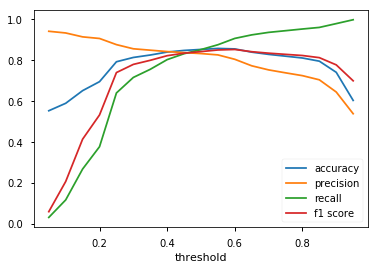

In [32]:
plt.plot( threshold_tuning['threshold'],threshold_tuning['accuracy'])
plt.legend()
plt.plot( threshold_tuning['threshold'],threshold_tuning['precision'])
plt.legend()
plt.plot( threshold_tuning['threshold'],threshold_tuning['recall'])
plt.legend()
plt.plot( threshold_tuning['threshold'],threshold_tuning['f1 score'])
plt.legend()
plt.xlabel('threshold')
plt.show()

We visualize the change of metrics with threshold in a plot. Obviously we wish get the peak of all 4 metrics but sometimes it may be contradictory. In the plot we can see accuracy and f1 score get its maximum value around threshold of 0.5, but the precision and recall change monotonically as threshold grows. It may be because with the increase of threshold, there tends to be more FP and less FN according to their defination, which leads to the situation. Thus acuuracy and f1 score may contain more performance information, so we think threshold of 0.55 is the best value for training sets among the range we choose, but it may be due to the distribution of training sets and perhaps lead to overfitting.

# C) 

Firstly, in this task we still need to calculate the metrics of features seleted for training. To make code more readable, we define the get_score function to get the metrics of model. The input includes the predicted probablity of a model after fitting the training features and labels, true testing labels and tuned threshold (in this task we just set it as 0.5).

In [29]:
def get_score(pred_prob,labels,threshold):
    pred=labels.copy()
    for i in range(len(labels)):
        if pred_prob[i][0]>threshold: pred[i]=-1
        else: pred[i]=1    
    TP=0
    TN=0
    FP=0
    FN=0
    for i in range(len(labels)):
        if labels[i]==1 and pred[i]==1 : TP=TP+1
        if labels[i]==-1 and pred[i]==-1 : TN=TN+1
        if labels[i]==1 and pred[i]==-1 : FN=FN+1
        if labels[i]==-1 and pred[i]==1 : FP=FP+1
            
    accuracy=(TP + TN)/len(labels)
    if TP+FP!=0: precision=(TP)/(TP + FP)
    else: precision=0
    if TP+FN!=0: recall=(TP)/(TP + FN)
    else: recall=0
    if recall+precision!=0: f1_score=2* precision* recall/(recall + precision)
    else: f1_score=0
    return accuracy, precision, recall, f1_score
    

Secondly, for later manually created cross validation, we prepare it for a function of data split index, build_k_indices. Among the inputs, y is the data we will split in later cross validation, the k_folder is the number we want to divide our dataset with (in the task k_folder is just 5) and seed is random number. We use np.random.seed to randomize the index in input dataset and use k_indices to split the randomized data into k_folder divisions.

In [30]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

After getting the data split index in build_k_indices. We define score_cv_lr_5 function to get the metric of selected features training compared with true labels with the method of training logistic regression classifier with 5-cross-validation. The function creates 5 temporary training sets and testing sets in a cycle according to defination of cross validation. For each temporary training sets, the function uses the logistic regression classifier to train with chosen features and verify the model in temporary testing sets by creating probabilities for temporary testing sets.  The output of score_cv_lr_5 is given by the metrics calculated from get_score function, and it outputs the mean accuracy in 5-cross-validation as the score (as stated in 2B).

In [37]:
def score_cv_lr_5(features,labels):
    score_sum=np.array([0,0,0,0])
    k_indices=build_k_indices(labels,5,10)
    for k in range(5):
        
        temp_test_indice = k_indices[k]
        temp_train_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
        temp_train_indice = temp_train_indice.reshape(-1)
        temp_train_features= features.values[temp_train_indice]
        temp_train_labels=labels.values[temp_train_indice]
        temp_test_features=features.values[temp_test_indice] 
        temp_test_labels=labels.values[temp_test_indice]
        
        logistic = LogisticRegression()
        logistic.fit(temp_train_features, temp_train_labels)
        pred_prob = logistic.predict_proba(temp_test_features)        
        
        temp_score=np.array(get_score(pred_prob, temp_test_labels, 0.5) )
        score_sum=score_sum+temp_score
    return score_sum/5
        

Upon finishing defining the functions above, we use greedy backward selection to iteratively remove features one by one. Our code creates a dataframe features_select with each potential feature of 32 in each row and its corresponding accuracy, which is initialized as 0.0. A list remove_feature is also defined and initialized empty. Then our code use the remove_feature to restore the removed features in each iteration. From the iteration 1 to 32, we choose each of the features remained in the dataframe, and combine the temporary single feature with the removed feature in the remove_feature to form a combination of temp_train_feature. After fitting them with training labels by logistic regression classifier, we can get the accuracy (chosen as main metric) of each remained single feature combined with the features already moved in remove_feature. Our code sort the dataframe by accuracy value on ascending order. Then we can remove the one feature with the smallest accuracy value, which is to say, that feature contribute least to the prediction combined with features already removed. And the dataframe updates itself by deleting the first row (corresponding to the feature decided to be removed in this iteration). That feature is also added to remove_feature to the next iteration. The iteration is not over until the dataframe features_select has the last one feature.The code approach complies to defination of greedy backward selection to remove features one by one. 

In [36]:
features_select = pd.DataFrame({'feature':np.array(train_features.columns),'accuracy':0.0})
temp_features_select=features_select.copy()
remove_feature=[]
while len(temp_features_select)>0:
    
    for i in range(len(temp_features_select)):
        temp_feature=temp_features_select['feature'].values[i]
        temp_train_feature=remove_feature+ [temp_feature]
        temp_score=score_cv_lr_5(train_features[temp_train_feature],train_labels)
        temp_features_select['accuracy'].values[i]= temp_score[0]
    temp_features_select=temp_features_select[['feature','accuracy']].sort_values(ascending=True, by='accuracy')
    temp_features_select.reset_index(inplace=True)
    temp_features_select=temp_features_select[['feature','accuracy']]
    temp_remove_feature=temp_features_select['feature'].values[0]
    k=len(temp_features_select)
    features_select['feature'].values[32-k]= temp_remove_feature
    remove_feature=remove_feature + [temp_remove_feature]
    temp_features_select=temp_features_select[1:]
    temp_features_select.reset_index(inplace=True)
    temp_features_select=temp_features_select[['feature','accuracy']]
remove_feature



['intake_number',
 'animal_type_Dog',
 'sex_upon_intake_Intact Male',
 'intake_condition_Pregnant',
 'animal_type_Bird',
 'intake_condition_Feral',
 'intake_type_Stray',
 'sex_upon_intake_Spayed Female',
 'sex_upon_intake_Unknown',
 'sex_upon_outcome_Unknown',
 'intake_condition_Other',
 'intake_condition_Aged',
 'intake_type_Euthanasia Request',
 'intake_condition_Nursing',
 'intake_type_Wildlife',
 'animal_type_Cat',
 'animal_type_Other',
 'intake_condition_Injured',
 'intake_condition_Normal',
 'intake_condition_Sick',
 'intake_year',
 'sex_upon_intake_Neutered Male',
 'sex_upon_intake_Intact Female',
 'age_upon_outcome_(years)',
 'age_upon_intake_(years)',
 'intake_type_Public Assist',
 'intake_type_Owner Surrender',
 'sex_upon_outcome_Spayed Female',
 'sex_upon_outcome_Intact Female',
 'time_in_shelter_days',
 'sex_upon_outcome_Intact Male',
 'sex_upon_outcome_Neutered Male']

The output of remove_feature above illustrates the order of the removal of features by greedy backward selection.

To verify the performance of removed features, we evaluate the subset of k features selection. The selection features array is in the inverse direction of removed feature array remove_feature. So we define select_feature as the inverse array of remove_feature to represent the first k feature selelction, e.g. when k=5, we remove the first 27 features by order in remove_feature and leave only the last 5 best features, which are the first 5 features in select_feature.

In [34]:
select_feature=remove_feature[::-1]
select_feature

['sex_upon_outcome_Neutered Male',
 'sex_upon_outcome_Intact Male',
 'time_in_shelter_days',
 'sex_upon_outcome_Intact Female',
 'sex_upon_outcome_Spayed Female',
 'intake_type_Owner Surrender',
 'intake_type_Public Assist',
 'age_upon_intake_(years)',
 'age_upon_outcome_(years)',
 'sex_upon_intake_Intact Female',
 'sex_upon_intake_Neutered Male',
 'intake_year',
 'intake_condition_Sick',
 'intake_condition_Normal',
 'intake_condition_Injured',
 'animal_type_Other',
 'animal_type_Cat',
 'intake_type_Wildlife',
 'intake_condition_Nursing',
 'intake_type_Euthanasia Request',
 'intake_condition_Aged',
 'intake_condition_Other',
 'sex_upon_outcome_Unknown',
 'sex_upon_intake_Unknown',
 'sex_upon_intake_Spayed Female',
 'intake_type_Stray',
 'intake_condition_Feral',
 'animal_type_Bird',
 'intake_condition_Pregnant',
 'sex_upon_intake_Intact Male',
 'animal_type_Dog',
 'intake_number']

# Choose the best k subset of features by 5-cross-validation in training set.

Now the task require of comparison of feature numbers of 1,5,10,15,20,25,30. We create a pandas dataframe train_features_score for this with 4 corresponding metrics values in initialization. For each potential feature number in the range, we select the first subset of features in select_feature as temporary selected features for training (temp_train_features_select) and use the logistic regression classifier to train the chosen features in training features with 5-cross-validation (previously defined score_cv_lr_5 function). We can get the 4 metircs (according to defined get_score function) for temporary selected features in 5-cross-validation and fill the values in the corresponding row in dataframe train_features_score.

In [39]:
train_features_score = pd.DataFrame({'feature_number':[1,5,10,15,20,25,30,32] , 'accuracy':0.0 , 'precision':0.0 , 'recall':0.0 , 'f1_score':0.0})
k_indices=build_k_indices(train_labels,5,10)
j=0
for i in [1,5,10,15,20,25,30,32]:
    temp_train_feature_select = select_feature[:i+1]
    temp_score=score_cv_lr_5(train_features[temp_train_feature_select],train_labels)
    train_features_score['accuracy'].values[j]=temp_score[0]
    train_features_score['precision'].values[j]=temp_score[1]
    train_features_score['recall'].values[j]=temp_score[2]
    train_features_score['f1_score'].values[j]=temp_score[3]
    j=j+1
train_features_score

    

,feature_number,accuracy,precision,recall,f1_score
0,1,0.624445,0.549997,0.482915,0.514243
1,5,0.766549,0.714303,0.721991,0.717870
2,10,0.810952,0.753011,0.804954,0.778058
3,15,0.813117,0.756662,0.805072,0.780067
4,20,0.813415,0.757338,0.804721,0.780266
5,25,0.813399,0.757372,0.804610,0.780230
6,30,0.813384,0.756887,0.805570,0.780420
7,32,0.813744,0.757360,0.805867,0.780815


According to created dataframe, we get the metrics corresponding to different feauture numbers in the task range. We can observe from the digits that feature number of 20 leads to an optimal value of accuracy and f1 score and obviously better than those of training all 32 features without selection. Also feature number of 15 has a very slight decrease in accuracy and have 5 less features, and feature of 1,5 or 10 lead to a much weaker performance. We can also get the plot of metric below.

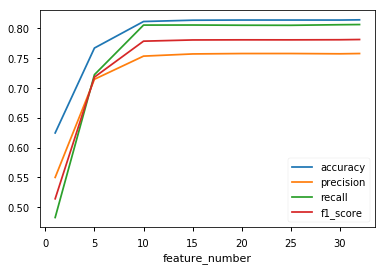

In [40]:
plt.plot( train_features_score['feature_number'],train_features_score['accuracy'])
plt.legend()
plt.plot( train_features_score['feature_number'],train_features_score['precision'])
plt.legend()
plt.plot( train_features_score['feature_number'],train_features_score['recall'])
plt.legend()
plt.plot( train_features_score['feature_number'],train_features_score['f1_score'])
plt.legend()
plt.xlabel('feature_number')
plt.show()

According to the plot, we can also observe that the performance greatly improve as feature numbers grow until 15. After that, the performance does not change a lot. Proper reduction of features can reduce the dimentions, which can not only reduce computation time and slightly improve performance, but also can be generalized to other datasets and models with better performance. When choosing the optimal feature numbers, we intepret the selection is a tradeoff among performance, computation complexity and ability of generalization. Thus, according to all analysis above, we think the optimal features number is between 15 and 20.

To verify the performance of our chosen optimal feature numbers, we do the same training on training sets and verify the performance on the testing sets. We create a pandas dataframe test_features_score for this with 4 corresponding metrics values in initialization. For each potential feature number in the range, we select the first subset of features in select_feature as temporary selected features for training (temp_train_features) and use the logistic regression classifier to train the chosen features before predicting the probability in testing set. We can get the 4 metircs for temporary selected features and fill the values in the corresponding row in dataframe test_features_score.

# Verify the chosen k subset on testing set.

In [42]:
test_features_score = pd.DataFrame({'feature_number':[1,5,10,15,20,25,30,32] , 'accuracy':0.0 , 'precision':0.0 , 'recall':0.0 , 'f1_score':0.0})
k=0
for i in [1,5,10,15,20,25,30,32]:
    temp_train_features = select_feature[:i+1]
    logistic = LogisticRegression(solver='lbfgs')
    logistic.fit(train_features[temp_train_features], train_labels)
    temp_test_pred_prob = logistic.predict_proba(test_features[temp_train_features])
    test_pred=test_labels.copy()
    for j in range(len(test_pred)):
        if temp_test_pred_prob[j][0]>0.5: test_pred.values[j]=-1
        else: test_pred.values[j]=1
    test_TP=0
    test_TN=0
    test_FP=0
    test_FN=0
    for j in range(len(test_labels)):
        if test_labels.values[j]==1 and test_pred.values[j]==1 : test_TP=test_TP+1
        if test_labels.values[j]==-1 and test_pred.values[j]==-1 : test_TN=test_TN+1
        if test_labels.values[j]==1 and test_pred.values[j]==-1 : test_FN=test_FN+1
        if test_labels.values[j]==-1 and test_pred.values[j]==1 : test_FP=test_FP+1
    temp_accuracy=(test_TP + test_TN)/(test_TP+test_TN+test_FP+test_FN)
    temp_precision=(test_TP)/(test_TP + test_FP)
    temp_recall=(test_TP)/(test_TP + test_FN)
    temp_f1_score=2* temp_precision* temp_recall/( temp_recall+ temp_precision)
        
    #temp_score= np.array(get_score(pred_prob, test_labels, 0.5) )
    
    test_features_score['accuracy'][k] = temp_accuracy
    test_features_score['precision'][k] = temp_precision
    test_features_score['recall'][k] = temp_recall
    test_features_score['f1_score'][k] = temp_f1_score
    k=k+1
test_features_score

,feature_number,accuracy,precision,recall,f1_score
0,1,0.650308,0.669396,0.478166,0.557848
1,5,0.764905,0.789744,0.668344,0.723991
2,10,0.844672,0.838329,0.821793,0.829979
3,15,0.852391,0.833045,0.850497,0.841680
4,20,0.852454,0.833244,0.850360,0.841715
5,25,0.852328,0.833111,0.850224,0.841581
6,30,0.851701,0.831385,0.851177,0.841164
7,32,0.851387,0.831184,0.850633,0.840796


We can also get the plot of metric below.

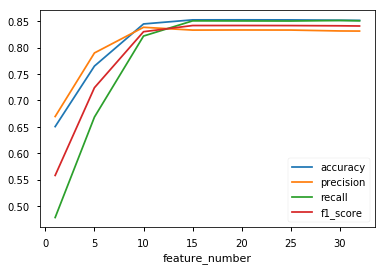

In [43]:
plt.plot( test_features_score['feature_number'],test_features_score['accuracy'])
plt.legend()
plt.plot( test_features_score['feature_number'],test_features_score['precision'])
plt.legend()
plt.plot( test_features_score['feature_number'],test_features_score['recall'])
plt.legend()
plt.plot( test_features_score['feature_number'],test_features_score['f1_score'])
plt.legend()
plt.xlabel('feature_number')
plt.show()

According to the dataframe and plot, we can also observe that the performance greatly improve as feature numbers grow until 15. After that, the performance does not change a lot. Therefore, the code and outputs implemented on testing sets verify our assumption above, which is to say, the optimal features number is between 15 and 20.Proper reduction of features can reduce the dimentions, which can not only reduce computation time and slightly improve performance, but also can be generalized to other datasets and models with better performance. When choosing the optimal feature numbers, we intepret the selection is a tradeoff among performance, computation complexity and ability of generalization.

To conclude our method, we define the get_score function to get the metrics of model to make the code more readable. The input includes the predicted probablity of a model after fitting the training features and labels, true testing labels and tuned threshold (in this task we just set it as 0.5).Secondly, for later manually created cross validation, we prepare it for a function of data split index, build_k_indices. Among the inputs, y is the data we will split in later cross validation, the k_folder is the number we want to divide our dataset with (in the task k_folder is just 5) and seed is random number. We use np.random.seed to randomize the index in input dataset and use k_indices to split the randomized data into k_folder divisions.After getting the data split index in build_k_indices. We define score_cv_lr_5 function to get the metric of selected features training compared with true labels with the method of training logistic regression classifier with 5-cross-validation. The function creates 5 temporary training sets and testing sets in a cycle according to defination of cross validation. For each temporary training sets, the function uses the logistic regression classifier to train with chosen features and verify the model in temporary testing sets by creating probabilities for temporary testing sets. The output of score_cv_lr_5 is given by the metrics calculated from get_score function, and it outputs the mean accuracy in 5-cross-validation as the score.Upon finishing defining the functions above, we use greedy backward selection to iteratively remove features one by one. Our code creates a dataframe features_select with each potential feature of 32 in each row and its corresponding accuracy, which is initialized as 0.0. A list remove_feature is also defined and initialized empty. Then our code use the remove_feature to restore the removed features in each iteration. From the iteration 1 to 32, we choose each of the features remained in the dataframe, and combine the temporary single feature with the removed feature in the remove_feature to form a combination of temp_train_feature. After fitting them with training labels by logistic regression classifier, we can get the accuracy (chosen as main metric) of each remained single feature combined with the features already moved in remove_feature. Our code sort the dataframe by accuracy value on ascending order. Then we can remove the one feature with the smallest accuracy value, which is to say, that feature contribute least to the prediction combined with features already removed. And the dataframe updates itself by deleting the first row (corresponding to the feature decided to be removed in this iteration). That feature is also added to remove_feature to the next iteration. The iteration is not over until the dataframe features_select has the last one feature.The code approach complies to defination of greedy backward selection to remove features one by one. 

Then we evaluate the subset of k features selection. The selection features array is in the inverse direction of removed feature array remove_feature. So we define a pandas dataframe train_features_score for this with 4 corresponding metrics values in initialization. For each potential feature number in the range, we select the first subset of features in select_feature as temporary selected features for training and use the logistic regression classifier to train the chosen features in training features with 5-cross-validation. We can get the 4 metircs for temporary selected features in 5-cross-validation and fill the values in the corresponding row in dataframe train_features_score.According to created dataframe, we get the metrics corresponding to different feauture numbers in the task range. We can observe from the digits that feature number of 20 leads to an optimal value of accuracy and f1 score and obviously better than those of training all 32 features without selection. Also feature number of 15 has a very slight decrease in accuracy and have 5 less features, and feature of 1,5 or 10 lead to a much weaker performance. According to the plot, we can also observe that the performance greatly improve as feature numbers grow until 15. After that, the performance does not change a lot. Proper reduction of features can reduce the dimentions, which can not only reduce computation time and slightly improve performance, but also can be generalized to other datasets and models with better performance. When choosing the optimal feature numbers, we intepret the selection is a tradeoff among performance, computation complexity and ability of generalization. 

To verify the features selection, we do the same training on training sets and verify the performance on the testing sets. We create a pandas dataframe test_features_score for this with 4 corresponding metrics values in initialization. For each potential feature number in the range, we select the first subset of features in select_feature as temporary selected features for training and use the logistic regression classifier to train the chosen features before predicting the probability in testing set. We can get the 4 metircs for temporary selected features and fill the values in the corresponding row in dataframe test_features_score.According to the dataframe and plot, we can also observe that the performance greatly improve as feature numbers grow until 15. After that, the performance does not change a lot, which verifies our previous assumption.
Thus, a number between 15 and 20 may be the optimal number to the problem.

# D) 

Firstly, we set the range of 2 hyperparameters: n_estimators and max_depth.
Since we do not have much experience in parameter tuning in random forest classifier, we just get the range that is frequently used in papers related to random forest classifers. The combination of 2 parameter ranged chosen has already taken quite long compuation time.
In order to reduce compuation time, we do not choose a wide range but only a frequently used range. Probably the results may be better if we choose a wider range, but the approach is the same at all.

In [60]:
n_estimators_range=range(5,100,5)
max_depth_range= range(1,20)

We have a dataframe rfc_score which is got from pd.merge and it illustratess each potential combination of ranges of n_estimators and max_depth with corresponding accuracy value that is initialized as 0.0.

In [61]:
ne_score=pd.DataFrame({'n_estimators':np.array(n_estimators_range),'accuracy':0.0})
mp_score=pd.DataFrame({'max_depth':np.array(max_depth_range),'accuracy':0.0})
rfc_score= pd.merge(ne_score, mp_score)
rfc_score= rfc_score[['n_estimators','max_depth','accuracy']]

Our code use the same 5-cross-validation in task 2C to realize the data split and randomization of training sets. Also for each potential combination of 2 parameters, we use random forest classifier with cross validation to get the mean accuracy of the chosen combination, and fill in the accuracy of the dataframe rfc_score in corresponding row. The approach complies to the grid search. And after running all combinations, the output of rfc_score is as follows.

In [65]:
from sklearn.ensemble import RandomForestClassifier
k_indices=build_k_indices(train_labels,5,10)
for i in range(len(rfc_score)):
    score_sum=np.array([0,0,0,0])
    temp_ne= rfc_score['n_estimators'].values[i]
    temp_mp= rfc_score['max_depth'].values[i]
    for k in range(5):
        temp_test_indice = k_indices[k]
        temp_train_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
        temp_train_indice = temp_train_indice.reshape(-1)
        temp_train_features= train_features.values[temp_train_indice]
        temp_train_labels=train_labels.values[temp_train_indice]
        temp_test_features=train_features.values[temp_test_indice] 
        temp_test_labels=train_labels.values[temp_test_indice]
        
        rfc = RandomForestClassifier(n_estimators= temp_ne, max_depth= temp_mp)
        rfc.fit(temp_train_features, temp_train_labels)
        pred_prob = rfc.predict_proba(temp_test_features)
        temp_score=np.array(get_score(pred_prob, temp_test_labels, 0.5) )
        score_sum=score_sum+temp_score
    temp_accuracy= score_sum[0]/5
    rfc_score['accuracy'].values[i]= temp_accuracy
rfc_score
        

,n_estimators,max_depth,accuracy
0,5,1,0.627787
1,5,2,0.754719
2,5,3,0.805303
3,5,4,0.809445
4,5,5,0.821935
5,5,6,0.824900
6,5,7,0.832274
7,5,8,0.835161
8,5,9,0.838597
9,5,10,0.840731


We get the optimal combination of n_estimators and max_depth in the range for the model that has the maximum accuracy value.

In [71]:
rfc_score_max=max(rfc_score['accuracy'])
best_ne= rfc_score[rfc_score['accuracy']==rfc_score_max]['n_estimators'].values[0]
best_md= rfc_score[rfc_score['accuracy']==rfc_score_max]['max_depth'].values[0]
print('the best n_estimators for the model: '+str(best_ne))
print('the best max_depth for the model: '+str(best_md))

the best n_estimators for the model: 75
the best max_depth for the model: 16


Again, the combination of 2 parameter ranged chosen has already taken quite long compuation time, so we do not choose a wide range but only a frequently used range in other papers. Probably the results may be better if we choose a wider range, but the approach is totally the same in our code.

We use the optimal combination as the parameter of random forest classifier and use it to fit the traing sets. Then we can use the model to predict the probability before getting the predicted testing labels. Again, we get the confusion matrix by comparing predicted labels with true labels.

In [88]:
rfc = RandomForestClassifier(n_estimators= best_ne, max_depth= best_md)
rfc.fit(train_features, train_labels)
test_pred_prob = rfc.predict_proba(test_features)
a=pd.Series(test_labels['outcome_type'].copy(),name='true labels')
test_pred=test_labels.copy()
for i in range(len(test_pred)):
    if test_pred_prob[i][0]>0.5: test_pred.values[i]=-1
    else: test_pred.values[i]=1
b=pd.Series(test_pred['outcome_type'].copy(),name='predicted labels')
test_confusion=pd.crosstab(a,b)
test_confusion

predicted labels,-1,1
true labels,,
-1,7096,1487
1,674,6677


We manually calcuate the 4 metrics according to the confusion matrix above and get the answer.

In [89]:
rfc_accuracy= (6677+7096)/(len(test_labels))
rfc_precision=6677/(6677+1487)
rfc_recall=6677/(6677+674)
rfc_f1_score=2* rfc_precision * rfc_recall/( rfc_precision+ rfc_recall)
print ('accuray : '+str(rfc_accuracy))
print ('precision : '+str(rfc_precision))
print ('recall : '+str(rfc_recall))
print ('f1 score : '+str(rfc_f1_score))

accuray : 0.8643780594954186
precision : 0.8178588926996571
recall : 0.9083117943136988
f1 score : 0.8607154366741863


Compared to the result calculated from Logistic Regression with all 32 features in task 2B, we can observe that the metric of accuracy, recall and f1 score have an improve in Random Forest Classifier with fine-tune hyperparameters, while there is a slight decrese in precision. We intepret that the random forest classifier leads to more accurate TP, that is to say, the model is going to predict more datasets to positive with accurate fitting. Because there are more negative labels in training sets, a weaker model may tend to label more data to negative. 
Therefore, the Random Forest Classifier with fine-tuned parameters has a slightly better performance overall.

To conclude our approach, we set the range of 2 hyperparameters: n_estimators and max_depth and geta dataframe rfc_score which is got from pd.merge and it illustratess each potential combination of ranges of n_estimators and max_depth with corresponding accuracy value at first. Then our code use the same 5-cross-validation in task 2C to realize the data split and randomization of training sets. Also for each potential combination of 2 parameters, we use random forest classifier with cross validation to get the mean accuracy of the chosen combination, and fill in the accuracy of the dataframe rfc_score in corresponding row. The approach complies to the grid search. And after running all combinations, we getthe output of rfc_score. We get the optimal combination of n_estimators and max_depth in the range for the model that has the maximum accuracy value.After that our code uses the optimal combination as the parameter of random forest classifier and use it to fit the traing sets. Then we can use the model to predict the probability before getting the predicted testing labels. Again, we get the confusion matrix by comparing predicted labels with true labels.Finally the 4 metrics are calculated from the confusion matrix.

In camparison with the result calculated from Logistic Regression with all 32 features in task 2B, we can observe that the metric of accuracy, recall and f1 score have an improve in Random Forest Classifier with fine-tune hyperparameters, while there is a slight decrese in precision. We intepret that the random forest classifier leads to more accurate TP, that is to say, the model is going to predict more datasets to positive with accurate fitting. Because there are more negative labels in training sets, a weaker model may tend to label more data to negative, so we intepret the Random Forest Classifier with fine-tuned parameters has a slightly better performance than the model in 2B.